In [23]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import janitor
import opendatasets as od
import os
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier

### 1. Import Data

In [24]:
# pima_df = od.download("https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv", data_dir="./data") ##already executed.

In [25]:
pima_df = pd.read_csv("./data/pima/pima-indians-diabetes.csv", header=0, sep=",")
pima_df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [26]:
pima_df.columns = ["pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "pedigree", "age", "class"]

In [27]:
pima_df.head(2)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1


### 2. EDA

In [28]:
pima_df.sample(10)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,class
158,17,163,72,41,114,40.9,0.817,47,1
670,1,99,58,10,0,25.4,0.551,21,0
332,12,106,80,0,0,23.6,0.137,44,0
122,5,132,80,0,0,26.8,0.186,69,0
351,3,61,82,28,0,34.4,0.243,46,0
563,0,91,80,0,0,32.4,0.601,27,0
714,7,187,50,33,392,33.9,0.826,34,1
185,8,181,68,36,495,30.1,0.615,60,1
242,6,119,50,22,176,27.1,1.318,33,1
746,1,81,74,41,57,46.3,1.096,32,0


In [29]:
pima_df.isna().sum()

pregnancies       0
glucose           0
blood_pressure    0
skin_thickness    0
insulin           0
bmi               0
pedigree          0
age               0
class             0
dtype: int64

#### 2.1 Feature analysis.

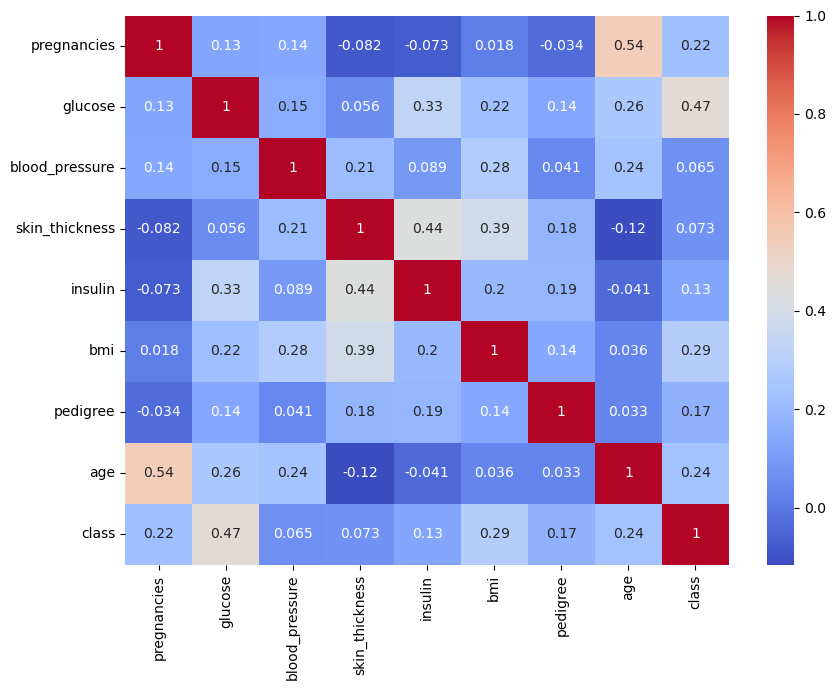

In [30]:
plt.figure(figsize=(9,7))
sns.heatmap(pima_df.corr(), cbar=True, cmap="coolwarm", annot=True)
plt.tight_layout()
plt.show()

In [31]:
pima_df.corr()["class"]

pregnancies       0.221087
glucose           0.465856
blood_pressure    0.064882
skin_thickness    0.073265
insulin           0.131984
bmi               0.292695
pedigree          0.173245
age               0.236417
class             1.000000
Name: class, dtype: float64

### 3. Training Random Forest model

In [32]:
X = pima_df.drop("class", axis=1)
y = pima_df["class"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Decision tree
from sklearn.ensemble import RandomForestClassifier

# Model creation
random_forest = RandomForestClassifier(n_estimators=10, random_state=42)

In [35]:
# Training
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [36]:
# Calculating predictions in train and test
y_train_pred = random_forest.predict(X_train)
y_test_pred  = random_forest.predict(X_test)

#### 3.1 Evaluating model

In [37]:
# Metrics
print(f"Train accuracy score: {accuracy_score(y_train, y_train_pred):.5f}")
print(f"Test accuracy score: {accuracy_score(y_test, y_test_pred):.5f}")

Train accuracy score: 0.99440
Test accuracy score: 0.73160


There is a significative difference between train and test accuracies.

In [38]:
feature_importances_df = pd.DataFrame(
    {
       "feature" : list(X.columns),
       "importance" : random_forest.feature_importances_ 
    }
).sort_values(by="importance", ascending=False)
feature_importances_df

,feature,importance
1,glucose,0.251010
5,bmi,0.143227
7,age,0.141232
6,pedigree,0.132584
0,pregnancies,0.104101
4,insulin,0.083910
2,blood_pressure,0.076752
3,skin_thickness,0.067183


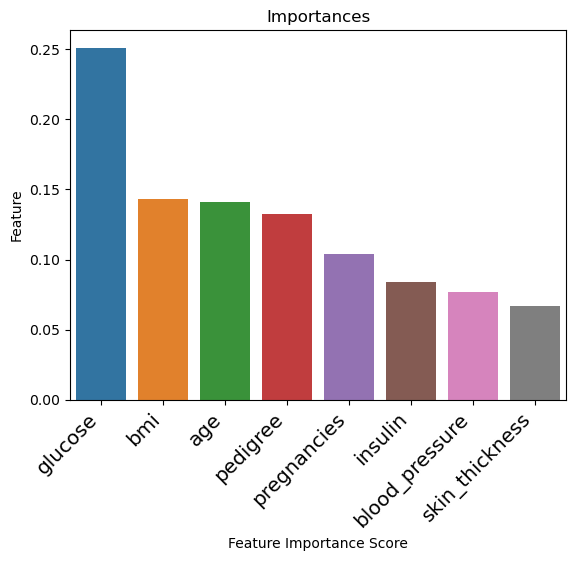

In [39]:
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Importances")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")
plt.show()